<a href="https://colab.research.google.com/github/KDiBSilva/Adult_Income/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Numpy
import numpy as np
# Pandas
import pandas as pd

# MatplotLib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

from sklearn import metrics
from sklearn.decomposition import PCA
## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

import warnings
warnings.filterwarnings('ignore')

#About Adult Income Dataset:

Information and dataset found from Kaggle: [Here](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

Dataset information also resourced from UCI: [Link](https://archive.ics.uci.edu/ml/datasets/adult)

___
Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. However, we will still explore other models to compare performance. 

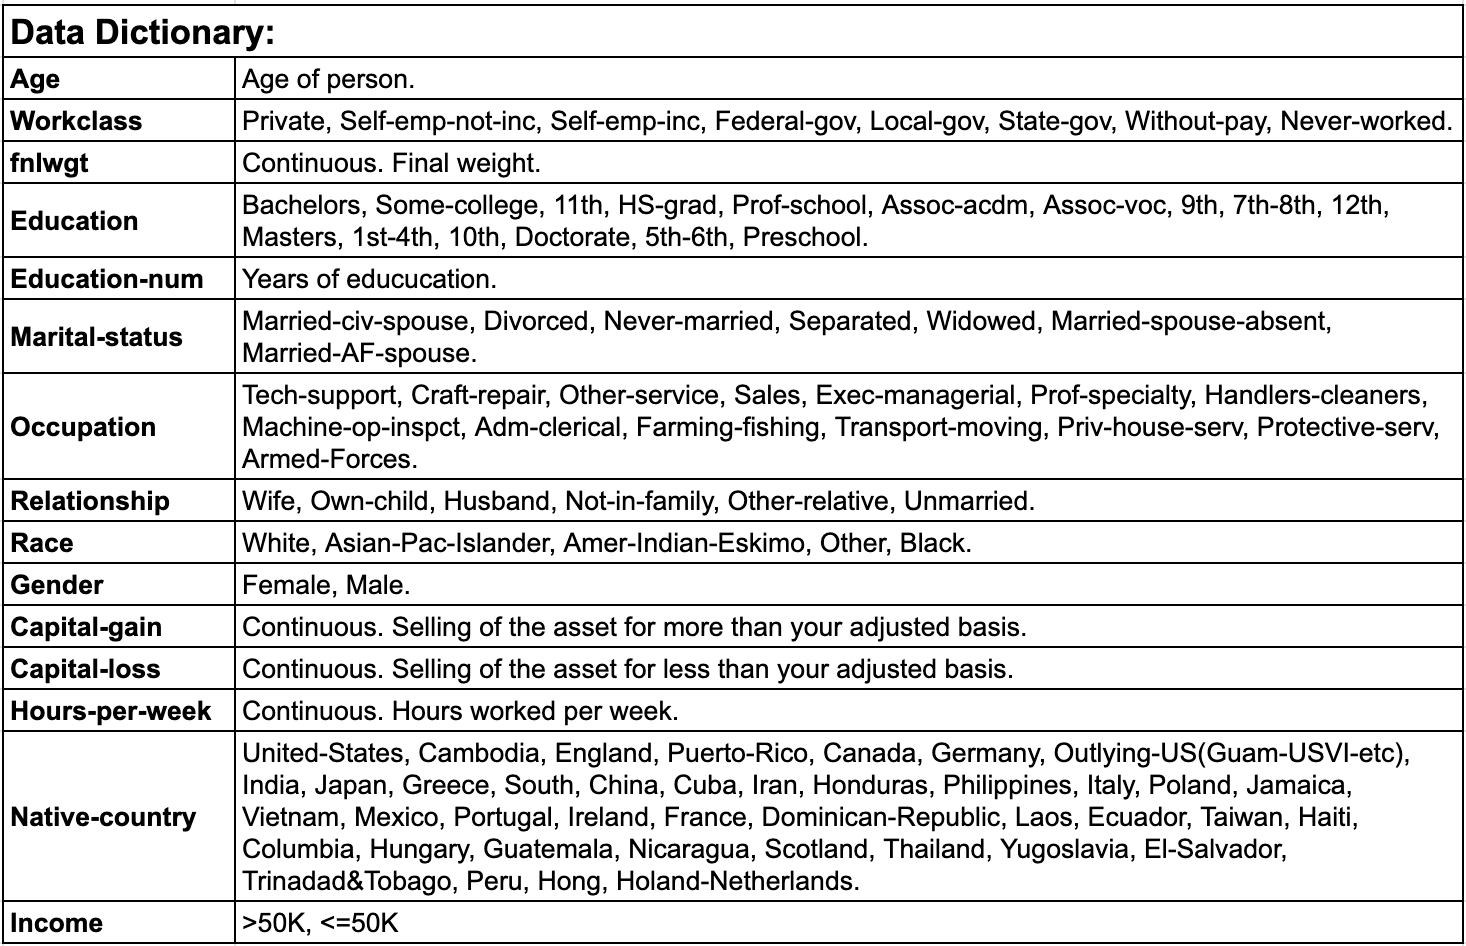


- Target column for this dataset is 'income'.
- Income column represents whether a person will have earn greater $50K or less based on the other values.
- This will be a classification problem as there are only two outcomes to predict, this column will be change to a 0 = >50K and 1 = <=50K.

#Load Dataset

In [4]:
# CSV
filename = '/content/drive/My Drive/Coding Dojo/Data/adult.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#Inspect & Clean

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- There are no missing values to address.
- There are no incorrect data types to address.

For Machine Learning
- Numerical(int64) column will need to be scaled(float).
- Categorical(object) column will need to be OneHotEncoded.

###Diplicates

In [7]:
# Duplicate values
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


- There are 52 duplicate to be removed. 

In [8]:
# Drop duplicates and save dataframe
df = df.drop_duplicates()

# Verify duplicates dropped
print(f'There are {df.duplicated().sum()} duplicate rows remaining.')

There are 0 duplicate rows remaining.


- Duplicates have been removed.

In [9]:
# Shape
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} column. \nWhich are {df.shape[0]} observations and {df.shape[1]-1} features with 1 target that will be used for modeling.')

There are 48790 rows and 15 column. 
Which are 48790 observations and 14 features with 1 target that will be used for modeling.


In [10]:
# Check for and address any impossible values in numeric columns.
df.describe(include='number')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# Finding how many values in the 'hours-per-week' column are over 60 hours.
sixtyplus = df['hours-per-week'] >= 60

df[sixtyplus].value_counts().sum()

3853

- 'hours-per-week' has a max value of 99, this was alarming when thinking of the common weekly work schedule. However, further exploration of this column shows that this dataset has 3,853 values great that 60 hours a week, which confirms this is not an error of any kind and needs no corrections.

In [12]:
# Check for and address any impossible values in object columns.
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


### Value Errors/ Missing Values

In [13]:
# Inspect categorical columns for errors
# Establish columns
cat_cols = make_column_selector(dtype_include='object')(df)
# For loop to display for all columns
for col in cat_cols:
  display(df[col].value_counts(normalize=True))

Private             0.693995
Self-emp-not-inc    0.079135
Local-gov           0.064275
?                   0.057286
State-gov           0.040603
Self-emp-inc        0.034720
Federal-gov         0.029350
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

HS-grad         0.323222
Some-college    0.222648
Bachelors       0.164234
Masters         0.054437
Assoc-voc       0.042222
11th            0.037139
Assoc-acdm      0.032814
10th            0.028469
7th-8th         0.019553
Prof-school     0.017094
9th             0.015495
12th            0.013425
Doctorate       0.012175
5th-6th         0.010391
1st-4th         0.005022
Preschool       0.001660
Name: education, dtype: float64

Married-civ-spouse       0.458414
Never-married            0.329617
Divorced                 0.135889
Separated                0.031359
Widowed                  0.031113
Married-spouse-absent    0.012851
Married-AF-spouse        0.000758
Name: marital-status, dtype: float64

Prof-specialty       0.126358
Craft-repair         0.125067
Exec-managerial      0.124657
Adm-clerical         0.114901
Sales                0.112749
Other-service        0.100820
Machine-op-inspct    0.061836
?                    0.057491
Transport-moving     0.048268
Handlers-cleaners    0.042447
Farming-fishing      0.030437
Tech-support         0.029617
Protective-serv      0.020127
Priv-house-serv      0.004919
Armed-Forces         0.000307
Name: occupation, dtype: float64

Husband           0.403833
Not-in-family     0.257368
Own-child         0.155134
Unmarried         0.105022
Wife              0.047776
Other-relative    0.030867
Name: relationship, dtype: float64

White                 0.854970
Black                 0.095983
Asian-Pac-Islander    0.031092
Amer-Indian-Eskimo    0.009633
Other                 0.008321
Name: race, dtype: float64

Male      0.668457
Female    0.331543
Name: gender, dtype: float64

United-States                 0.897561
Mexico                        0.019328
?                             0.017545
Philippines                   0.006026
Germany                       0.004222
Puerto-Rico                   0.003771
Canada                        0.003730
El-Salvador                   0.003177
India                         0.003095
Cuba                          0.002828
England                       0.002603
China                         0.002501
South                         0.002357
Jamaica                       0.002173
Italy                         0.002152
Dominican-Republic            0.002111
Japan                         0.001886
Poland                        0.001783
Guatemala                     0.001763
Vietnam                       0.001763
Columbia                      0.001742
Haiti                         0.001537
Portugal                      0.001373
Taiwan                        0.001332
Iran                          0.001209
Greece                   

<=50K    0.760586
>50K     0.239414
Name: income, dtype: float64

- No inconsistent values found in column of object type.
- There was no missing values because the unknown values are filled in with
'?'. Columns: workclass, occupation, native-country have a small  the percentage of these values is low, so I will drop them from this data set.

In [14]:
# Drop '?' values form "workclass" column
df.drop(df.index[df['workclass'] == '?'], inplace = True)
# Confirm drop
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [15]:
# Drop '?' values form "occupation" column
df.drop(df.index[df['occupation'] == '?'], inplace = True)
# Confirm drop
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [16]:
# Drop '?' values form "native-country" column
df.drop(df.index[df['native-country'] == '?'], inplace = True)
# Confirm drop
df['native-country'].value_counts()

United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [17]:
# Correct Entries
df['native-country'] = df['native-country'].replace('Hong','Hong-Kong')

# Confirm corrections
df['native-country'].value_counts()

United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [18]:
# Shape
df.shape
print(f'There are now {df.shape[0]} rows and {df.shape[1]} column after dropping the unknown("?") values. \nWhich are {df.shape[0]} observations and {df.shape[1]-1} features with 1 target that will be used for modeling.')

There are now 45175 rows and 15 column after dropping the unknown("?") values. 
Which are 45175 observations and 14 features with 1 target that will be used for modeling.


In [19]:
# Check amount 'fnlwgt' unique values
df['fnlwgt'].nunique()

26741

### Unnecessary Columns

In [20]:
# Drop the unnecessary columns
df = df.drop(columns=['relationship', 'education', 'fnlwgt'])
df.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K


Columns Removed:
- 'relationship' column is being dropped as it is not a key feature for predicting income. Where as 'marital-status' will give similar information and does provide a useful observation for income earned. 
- 'education' is being dropped as 'education-num' will serve the purpose of education status. 
- 'fnlwgt' will also be dropped as this has 28,523 unique values and will not be benefical to our model.

#Exploratory Visualization

###Catagorical
- 'workclass'
- 'marital-status'
- 'occupation'
- 'race'
- 'gender'
- 'native-country'
- 'income'

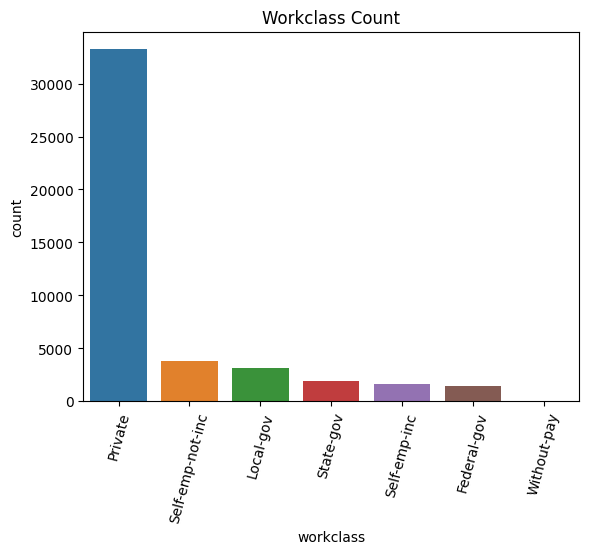

In [21]:
# countplot for 'workclass' in decending order
ax = sns.countplot(data = df, x= 'workclass', order=df['workclass'].value_counts().index)
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
# title
ax.set_title('Workclass Count');

* 'private' has the highests count 'without pay being the lowest.
* There are three seperate classes within government, we will combine the three goverment work classes under one goverment class to clean up the observations for our models.

### Workclass Column Adjustment

In [22]:
# Replace the the Local, State and Federal government classes to just one government class
df['workclass'] = df['workclass'].replace({'Local-gov':'Government', 'State-gov': 'Government', 
                                           'Federal-gov': 'Government'})
# Confirm changes
df['workclass'].value_counts()

Private             33262
Government           6452
Self-emp-not-inc     3795
Self-emp-inc         1645
Without-pay            21
Name: workclass, dtype: int64

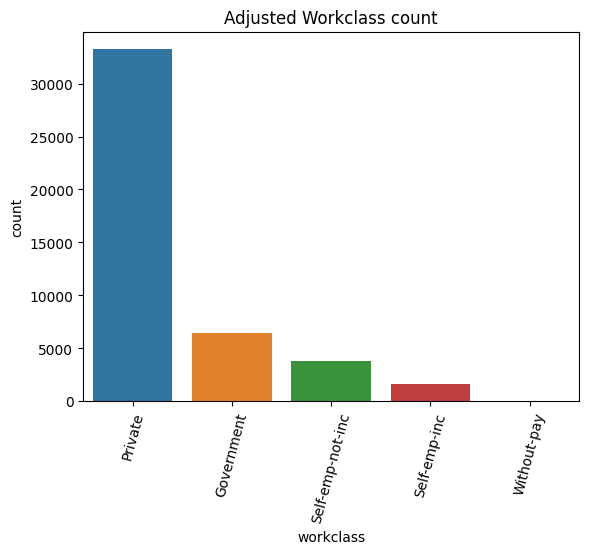

In [23]:
# countplot for 'workclass' in decending order
ax = sns.countplot(data = df, x= 'workclass', order=df['workclass'].value_counts().index)
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
# title
ax.set_title('Adjusted Workclass count');

In [24]:
df['workclass'].value_counts()

Private             33262
Government           6452
Self-emp-not-inc     3795
Self-emp-inc         1645
Without-pay            21
Name: workclass, dtype: int64

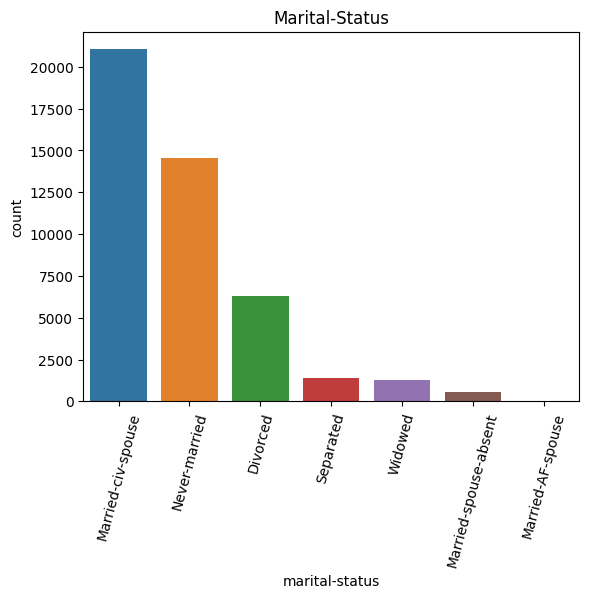

In [25]:
# countplot for 'marital-status' in decending order
ax = sns.countplot(data = df, x= 'marital-status', order=df['marital-status'].value_counts().index)
# title
ax.set_title('Marital-Status')
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

In [26]:
df['marital-status'].value_counts()

Married-civ-spouse       21042
Never-married            14567
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

- Value count for 'Married-AF-spouse' appear to be zero. 

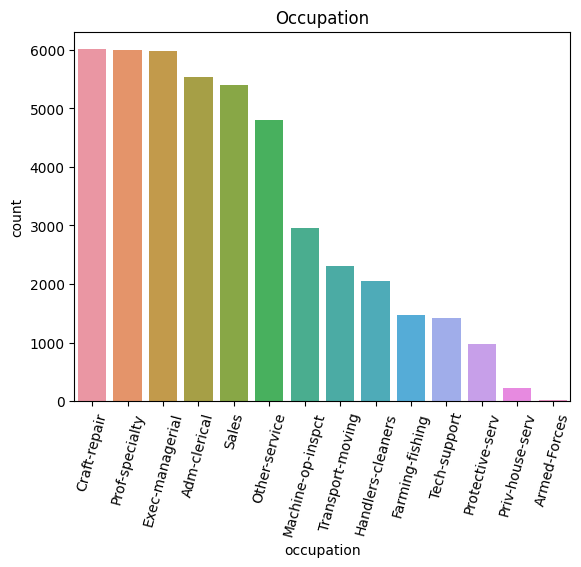

In [27]:
# countplot for 'occupation' in decending order
ax = sns.countplot(data = df, x = 'occupation', order=df['occupation'].value_counts().index)
# title
ax.set_title('Occupation')
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

* Private house services and Armed Forces appear to be the outliers of the Occupation data. 

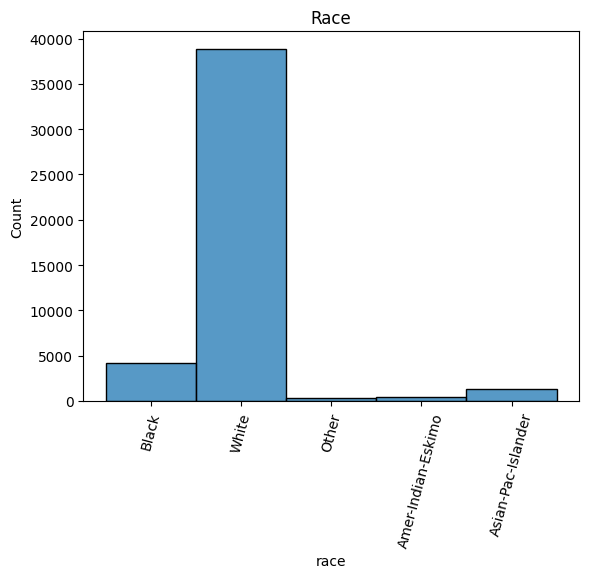

In [28]:
# histogram 'race'
ax = sns.histplot(data= df, x= 'race')
# title
ax.set_title('Race')
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

- 'White' is the most frequent race in this dataset.

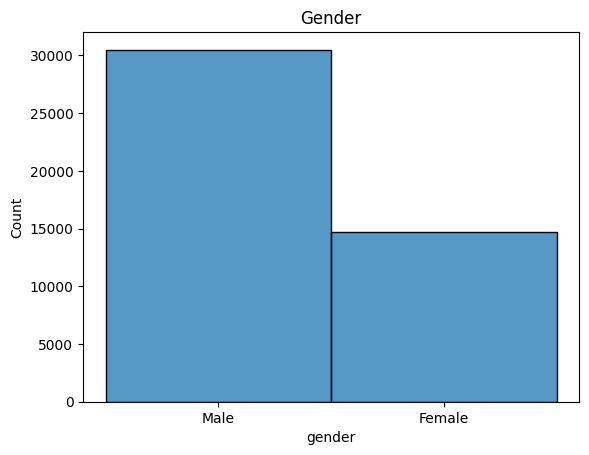

In [29]:
# histogram for 'gender'
ax = sns.histplot(data= df, x= 'gender')
# title
ax.set_title('Gender');

* Greater accurences of Males in this dataset. 

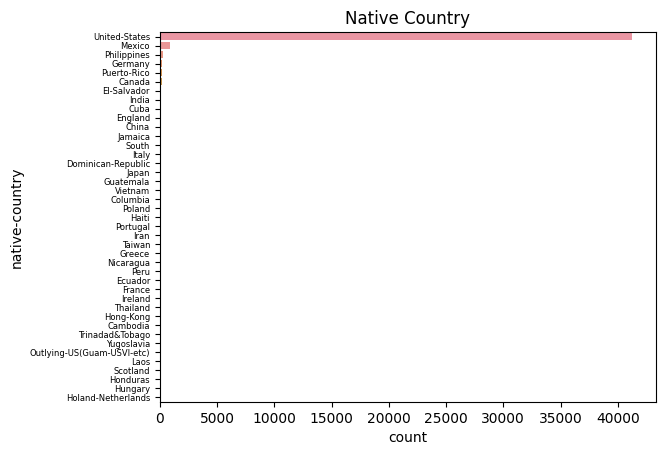

In [30]:
# count plot for 'native-country' in decending order
ax = sns.countplot(data = df, y= 'native-country', order=df['native-country'].value_counts().index)
# adjusted y label font size
plt.tick_params(axis= 'y', labelsize=6)
# title
ax.set_title('Native Country');

- For 'native-country' this count plot shows that of the 45,175 observations in this dataset, 40,000 are of the United-States, this column as is will not be valuable for our models in predicting income and will need to be addressed. 

In [31]:
df['native-country'].nunique()

41

###Native Country Column Adjustment (Continent)

In [32]:
# Rename column to reflect value changes. (country to continent)
df = df.rename(columns= {'native-country' : 'continent'})

In [33]:
# Converting country values to North America value
df['continent'] = df['continent'].replace(['Canada','Cuba','Dominican-Republic','El-Salvador','Guatemala','Haiti','Honduras','Jamaica','Mexico',
                                                'Nicaragua','Outlying-US(Guam-USVI-etc)','Puerto-Rico','United-States'], 'North_America' )  

In [34]:
# Converting country values to South America value
df['continent'] = df['continent'].replace(['Columbia','Ecuador','Peru','South','Trinadad&Tobago'], 'South_America')

In [35]:
# Converting country values to Aisa value
df['continent'] = df['continent'].replace(['Cambodia','China','Hong-Kong','India','Iran','Japan','Laos','Philippines',
                                                'Taiwan','Thailand','Vietnam'], 'Aisa')

In [36]:
# Converting country values to Europe value
df['continent'] = df['continent'].replace(['England','France','Germany','Greece','Holand-Netherlands','Hungary','Ireland','Italy','Poland','Portugal',
                                                'Scotland','Yugoslavia'], 'Europe')

In [37]:
# Verify new column data
df['continent'].value_counts()

North_America    43211
Aisa               929
Europe             738
South_America      297
Name: continent, dtype: int64

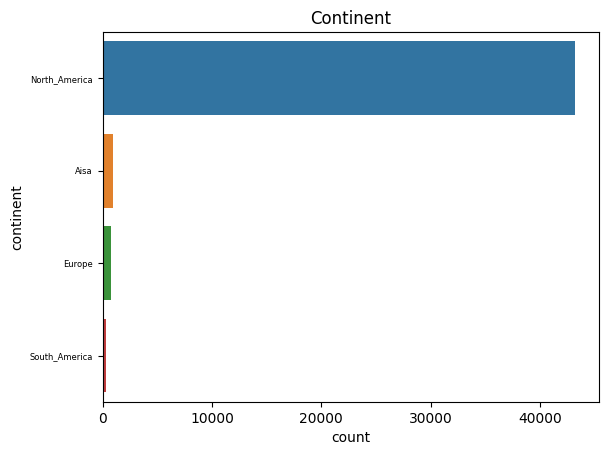

In [38]:
# count plot for updated 'coninent' column in decending order
ax = sns.countplot(data = df, y= 'continent', order=df['continent'].value_counts().index)
# adjusted y label font size
plt.tick_params(axis= 'y', labelsize=6)
# title
ax.set_title('Continent');

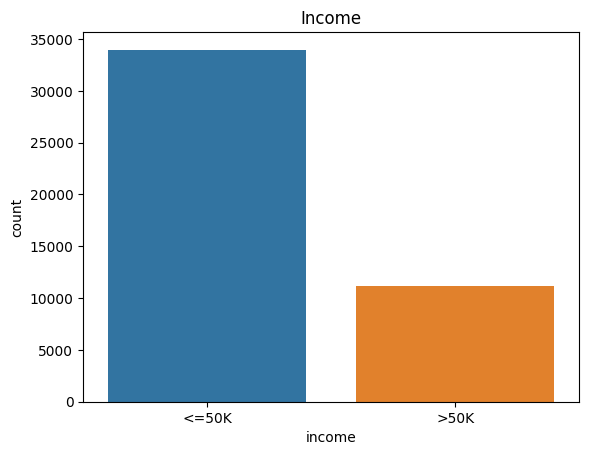

In [39]:
# countplot for 'income' / Target
ax = sns.countplot(data = df, x = 'income', order=df['income'].value_counts().index)
# title
ax.set_title('Income');

###Converting target from string column 'income' to numeric column 'greaterfifty'

In [40]:
df['income'].value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

In [41]:
# Change the values to numbers
df['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
# Change Column name, Check values
df.rename(columns={'income':'greaterfifty'}, inplace=True)
df['greaterfifty'].value_counts()

0    33973
1    11202
Name: greaterfifty, dtype: int64

* Much lower count of people earning an income higher than 50K. 

###Numerical
- 'age'
- 'education'
- 'capital-gain'
- 'capital-loss'
- 'hours-per-week'

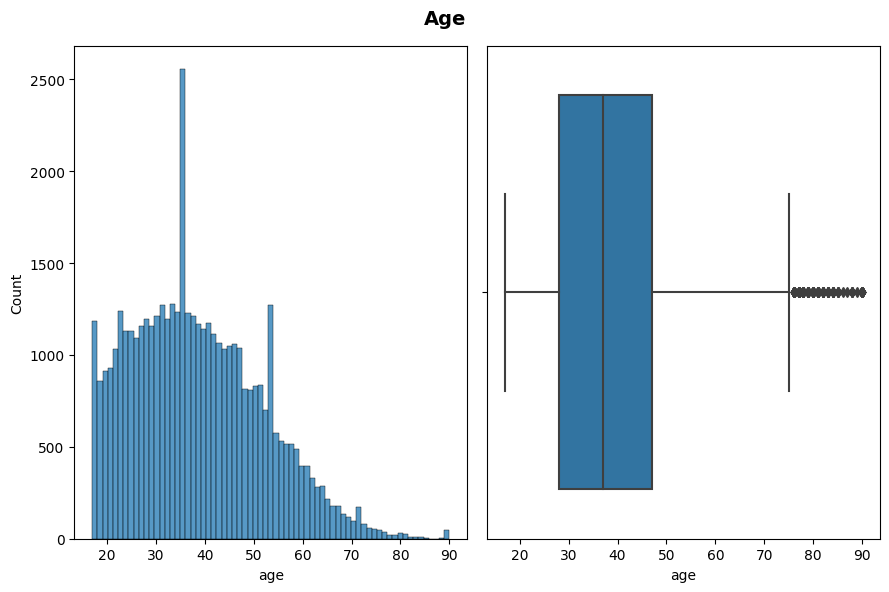

In [42]:
# histogram and boxplot for 'age'
# figure for two plots 
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))
# histogram
sns.histplot(data = df, x = 'age', ax = axes[0])
# boxplot
sns.boxplot(data = df, x = 'age', ax = axes[1])
# figure title
fig.suptitle('Age', fontsize = 14, fontweight = 'bold', y = .98)
# figure fit
fig.tight_layout();

* Highter count of people about 35 years of age. 

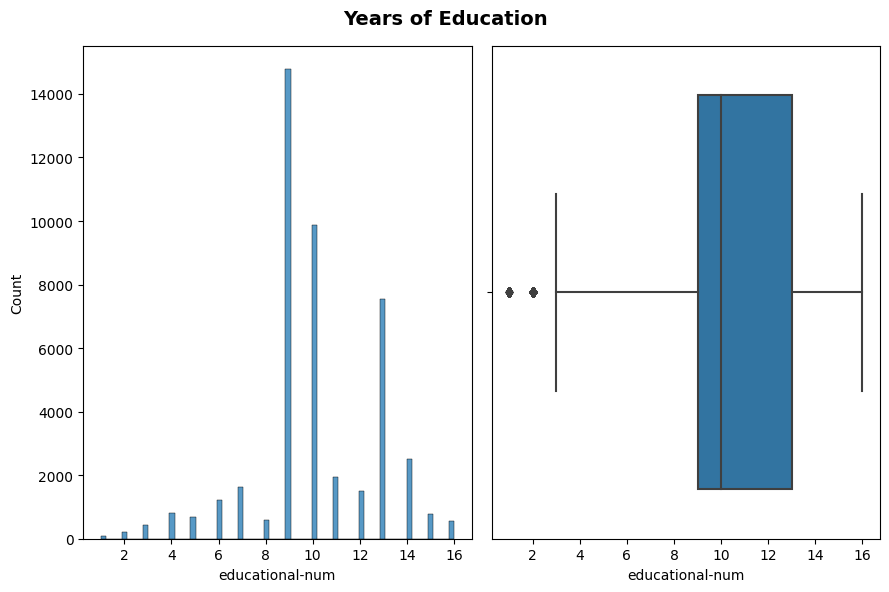

In [43]:
# histogram and boxplot for 'educational-num'
# figure for two plots 
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))
# histogram
sns.histplot(data = df, x = 'educational-num', ax = axes[0])
# boxplot
sns.boxplot(data = df, x = 'educational-num', ax = axes[1])
# figure title
fig.suptitle('Years of Education', fontsize = 14, fontweight = 'bold', y = .98)
# figure fit
fig.tight_layout();

- Outliers here look to be those less than 3 years of education.

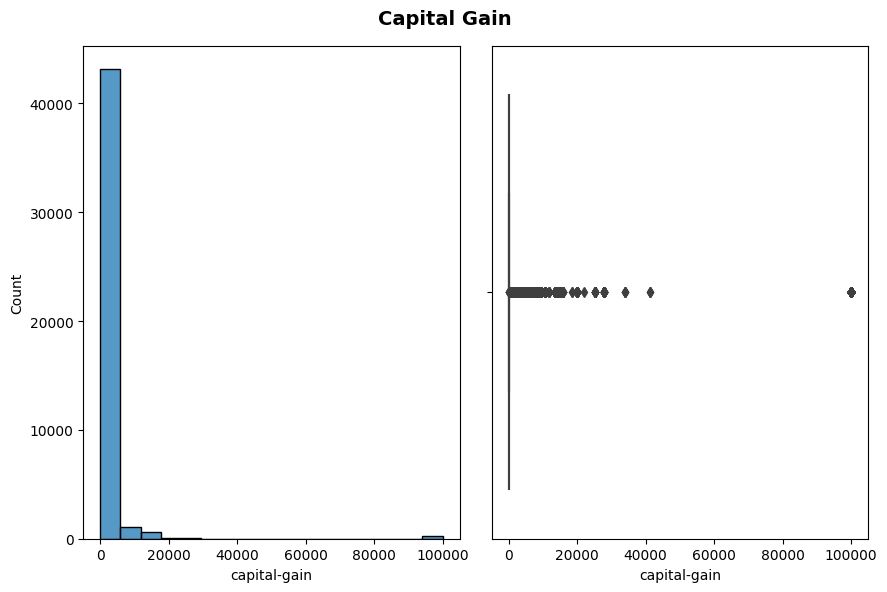

In [44]:
# histogram and boxplot for 'capital-gain'
# figure for two plots 
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))
# histogram
sns.histplot(data = df, x = 'capital-gain', ax = axes[0])
# boxplot
sns.boxplot(data = df, x = 'capital-gain', ax = axes[1])
# figure title
fig.suptitle('Capital Gain', fontsize = 14, fontweight = 'bold', y = .98)
# figure fit
fig.tight_layout();

- Outliers here are about 30,000+ with a major outlier in the 100,000 for capital gain.

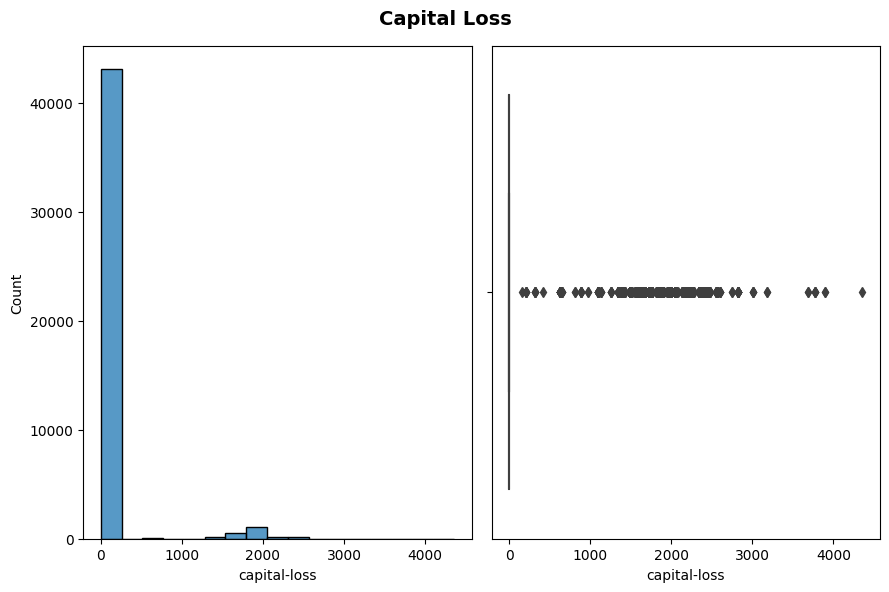

In [45]:
# histogram and boxplot for 'capital-loss'
# figure for two plots 
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))
# histogram
sns.histplot(data = df, x = 'capital-loss', ax = axes[0])
# boxplot
sns.boxplot(data = df, x = 'capital-loss', ax = axes[1])
# figure title
fig.suptitle('Capital Loss', fontsize = 14, fontweight = 'bold', y = .98)
# figure fit
fig.tight_layout();

- Outliers here appear to be capital losses of 3500+

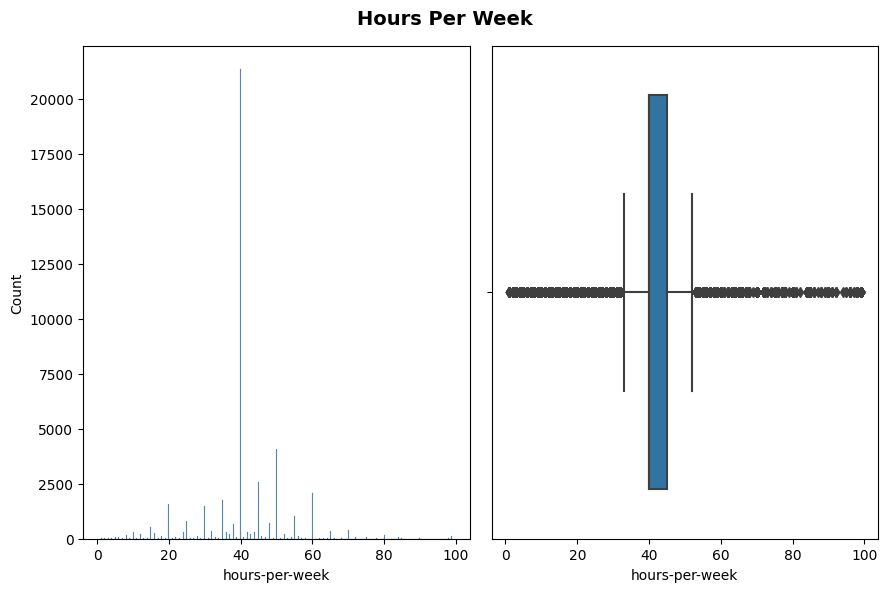

In [46]:
# histogram and boxplot for 'hours-per-week'
# figure for two plots 
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))
# histogram
sns.histplot(data = df, x = 'hours-per-week', ax = axes[0])
# boxplot
sns.boxplot(data = df, x = 'hours-per-week', ax = axes[1])
# figure title
fig.suptitle('Hours Per Week', fontsize = 14, fontweight = 'bold', y = .98)
# figure fit
fig.tight_layout();

- 40 hours is the most common with a outliers both greater and less than 40.

In [47]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,age,educational-num,capital-gain,capital-loss,hours-per-week,greaterfifty
age,1.00,0.04,0.08,0.06,0.10,0.24
educational-num,0.04,1.00,0.13,0.08,0.15,0.33
capital-gain,0.08,0.13,1.00,-0.03,0.08,0.22
capital-loss,0.06,0.08,-0.03,1.00,0.05,0.15
hours-per-week,0.10,0.15,0.08,0.05,1.00,0.23
greaterfifty,0.24,0.33,0.22,0.15,0.23,1.00


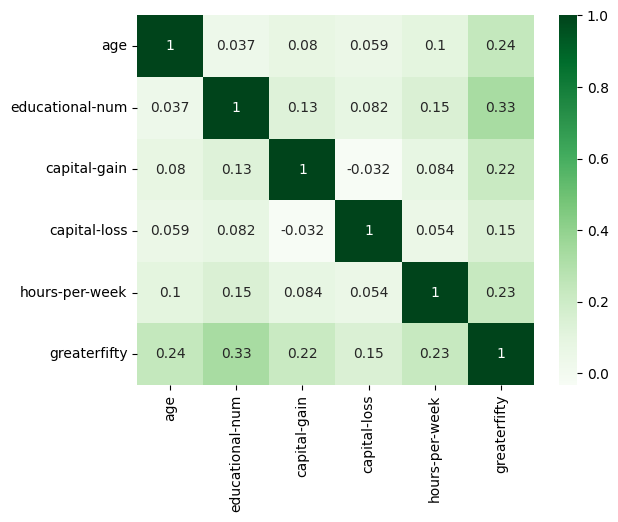

In [48]:
# Make a heatmap of correlations
sns.heatmap(corr, cmap = 'Greens', annot = True);

- Capital-gain, hours-per-week, age and educational-num have a low correlation to the target(greaterfifty/income). 
- Very low correlation with Education and Hours per week as well as with Capital- gain. 

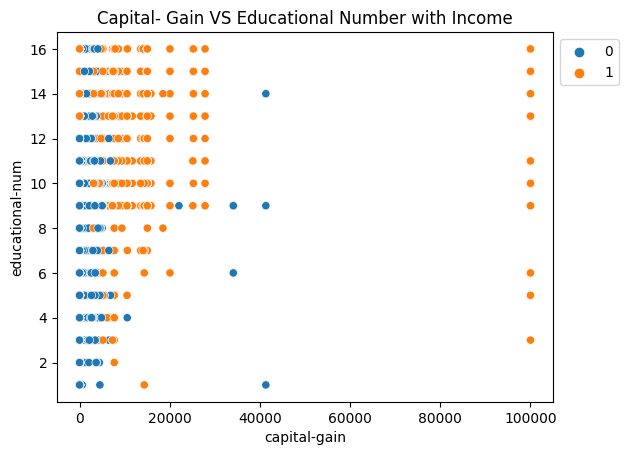

In [49]:
# Exploring the Capital- gain and Educational- num 
ax = sns.scatterplot(data = df, x = 'capital-gain', y = 'educational-num', hue = 'greaterfifty');
ax.set_title('Capital- Gain VS Educational Number with Income')
ax.legend(bbox_to_anchor = [1, 1]);

- This scatterplot shows that persons with a higher number of education tend to be in the greater than 50K for income.
- Although the data is indeed scattered, those with higher education tend to also have the highest capital gains, which shows the important role of assest and the financial impact. 

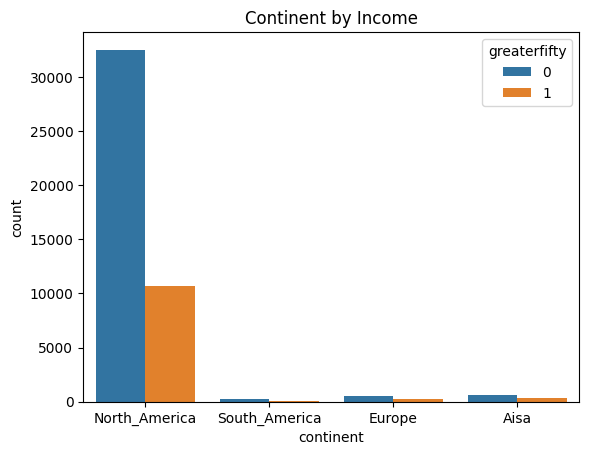

In [50]:
ax = sns.countplot(data = df, x= 'continent', hue = 'greaterfifty')
ax.set_title('Continent by Income');

Further exploratory visualizations to further understand the data and search for trends.

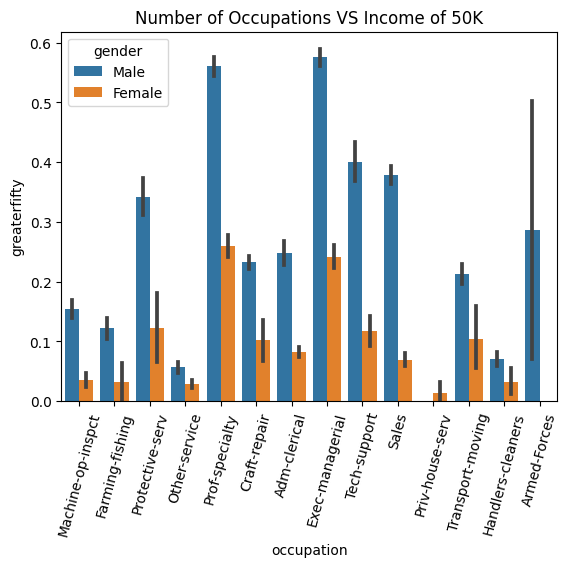

In [51]:
# Barplot
ax = sns.barplot(x=df['occupation'], y= df['greaterfifty'], hue= df['gender'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);
ax.set_title('Number of Occupations VS Income of 50K');

* Female are on the lesser end of the income with the exception of the 'Priv-house-serv' occupation. 

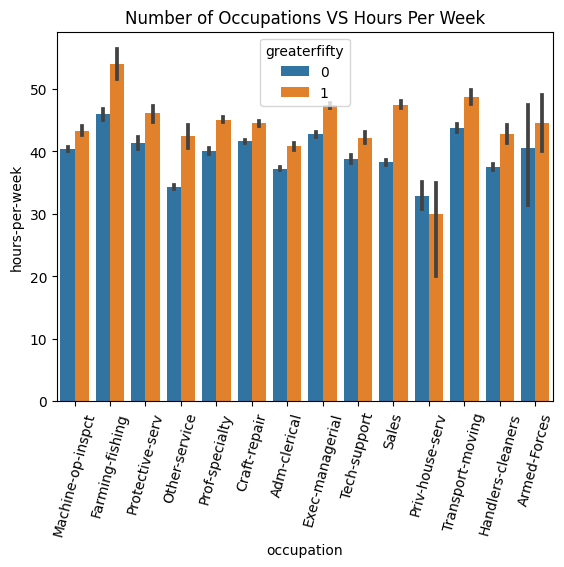

In [52]:
# Barplot
ax = sns.barplot(x=df['occupation'], y= df['hours-per-week'], hue= df['greaterfifty'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);
ax.set_title('Number of Occupations VS Hours Per Week');

* Increase hours of work to correspond with earning a higher income, with the exception of the 'Priv-house-serv' occupation.
* 'Farming-fishing' has the most hours and the highest average for an income of greater than 50K.

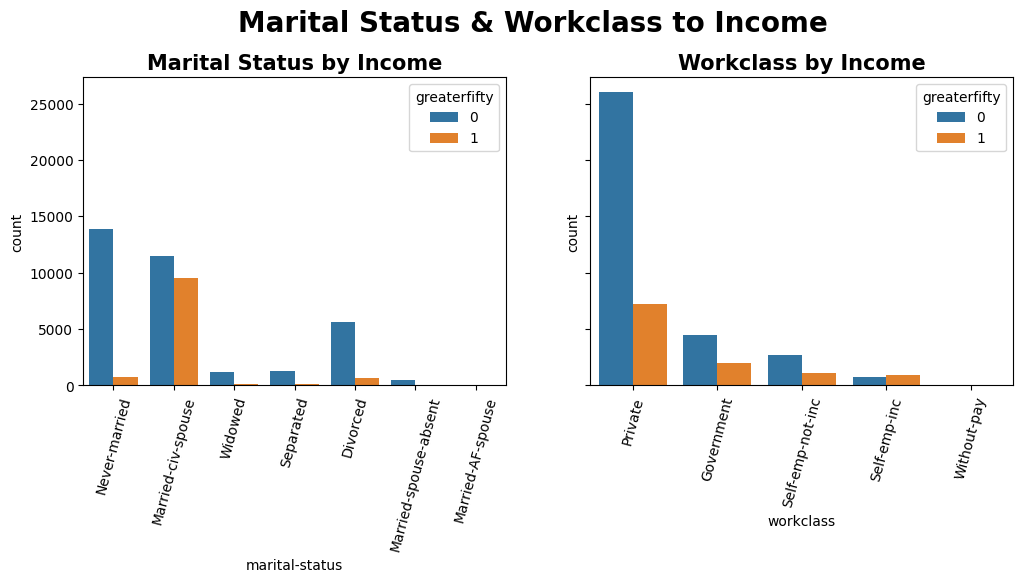

In [53]:
#Countplot 2 columns
# Define fig and ax objects using plt.subplots()
fig, axes = plt.subplots(ncols = 2, figsize = (12,4), sharey = True)

# Plot 1
sns.countplot(data = df, x = 'marital-status',hue= df['greaterfifty'], ax = axes[0])
# Set the Title
axes[0].set_title('Marital Status by Income', fontsize = 15, fontweight = 'bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)

# Plot 2
sns.countplot(data = df, x = 'workclass', hue= df['greaterfifty'], ax = axes[1])
# Set the Title
axes[1].set_title('Workclass by Income', fontsize = 15, fontweight = 'bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75)

# Set Figure title
fig.suptitle('Marital Status & Workclass to Income', fontsize = 20, fontweight = 'bold', y = 1.05);

* 'Married-civ-spouse' is the status with the highest count of indidivuals earning an income of greater than 50K. Perhaps the dependent playing a part on netted income.
* 'Private' work class is the most common and the lead in greater than 50K income. 

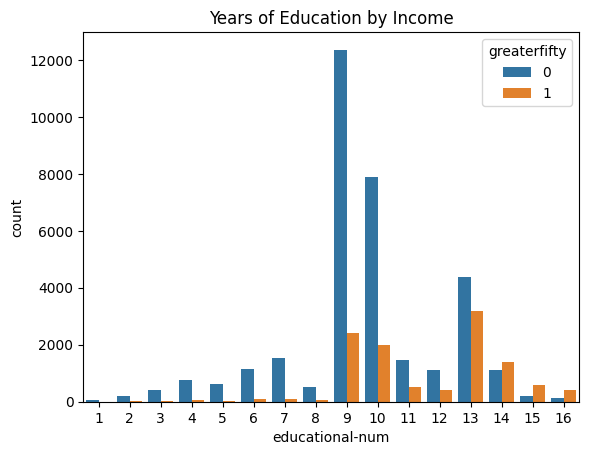

In [54]:
ax = sns.countplot(data = df, x= 'educational-num', hue = 'greaterfifty')
ax.set_title('Years of Education by Income');

* Higher years of education appear to be the individuals with a higher than 50K income.

#Explanatory Analysis

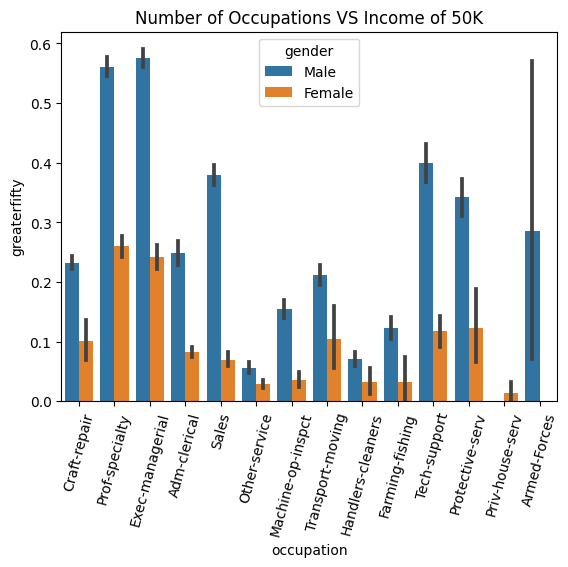

This shows that Males dominate gender in this dataset and are most likly to reach an income greater than 50K. However, for both genders the Professional Specialty and Executive Managerial occupation appear to be the the highest for income.

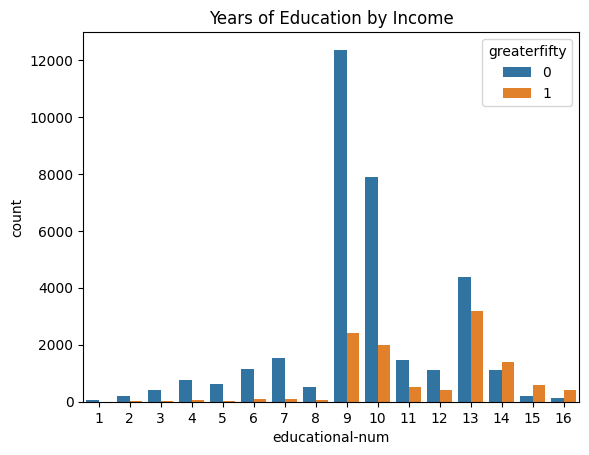

In this count plot there are must less instances of individuals making more than 50K as it is more common to have an income of 50K or less. 9 years or more have the most instances of an income greater than 50K. 13 years is the highest in terms of income and second being 9 years. 

#Preprocessing

### Converting Gender column to IsFemale

In [55]:
# Counts for Gender
df['gender'].value_counts()

Male      30495
Female    14680
Name: gender, dtype: int64

In [56]:
# Changing Gender to numerical 
df['gender'].replace({'Male':0, 'Female':1}, inplace=True)
# Changing column name
df.rename(columns={'gender':'IsFemale'}, inplace=True)
# Verifying counts for 'IsFemale'
df['IsFemale'].value_counts()

0    30495
1    14680
Name: IsFemale, dtype: int64

In [57]:
 # DF Check 
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   educational-num  45175 non-null  int64 
 3   marital-status   45175 non-null  object
 4   occupation       45175 non-null  object
 5   race             45175 non-null  object
 6   IsFemale         45175 non-null  int64 
 7   capital-gain     45175 non-null  int64 
 8   capital-loss     45175 non-null  int64 
 9   hours-per-week   45175 non-null  int64 
 10  continent        45175 non-null  object
 11  greaterfifty     45175 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.5+ MB


In [58]:
## Create a copy of the dataset for Modeling
ml_df = df.copy()

In [59]:
# X Features
X = ml_df.drop(columns = 'greaterfifty').copy()
#Target
y = ml_df['greaterfifty'].copy()

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Target
y_train.value_counts(normalize=True)

0    0.752044
1    0.247956
Name: greaterfifty, dtype: float64

In [60]:
#Scale Nominal(Categorical) features with OneHotEncoder

# Instantiate a OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

# Get list of categorical columns 
cat_selector = make_column_selector(dtype_include='object')


In [61]:
#Scale Numerical features with Standard Scaler

# Instantiate a StandardScaler
scaler = StandardScaler()

# Get list of numeric columns
num_selector = make_column_selector(dtype_include='number')


In [62]:
# Pepreocessor, Column Transformer

preprocessor = make_column_transformer((scaler, num_selector), (ohe, cat_selector))
preprocessor


ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])

# Modeling

##K- Nearest Neighbors Model

In [63]:
# Labels
labels= ['<=50K', '>50K']

In [64]:
# KNN
knn = KNeighborsClassifier()

# Model pipeline
knn_pipe = make_pipeline(preprocessor, knn)

###KNN Tunning with GridSearchCV

In [65]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                        

In [66]:
# Tune with GridSearchCV
params = {'kneighborsclassifier__n_neighbors':range(1,10),
          'kneighborsclassifier__weights': ['uniform', 'distance']}

In [67]:
# Fit GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 10),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [68]:
# View best params
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__weights': 'uniform'}

In [69]:
#Save best tune
best_knn_gs = knn_gs.best_estimator_

In [70]:
# Save predictions for the train dataset
gs_knn_train_preds = best_knn_gs.predict(X_train)

# Save predictions for the test dataset
gs_knn_test_preds = best_knn_gs.predict(X_test)

KNN Tuned Metrics

In [71]:
# Classifier Report for scoring and info

# Save Train Classification Report
gs_knn_train_report = classification_report(y_train, gs_knn_train_preds,
                                         target_names=labels)

# Save Test Classification Report
gs_knn_test_report = classification_report(y_test, gs_knn_test_preds,
                                         target_names=labels)

# Print the Classification Report(s)
print('Classification Report for Train\n')
print(gs_knn_train_report)

print('Classification Report for Test\n')
print(gs_knn_test_report)

Classification Report for Train

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91     25480
        >50K       0.76      0.67      0.71      8401

    accuracy                           0.87     33881
   macro avg       0.83      0.80      0.81     33881
weighted avg       0.86      0.87      0.86     33881

Classification Report for Test

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      8493
        >50K       0.70      0.59      0.64      2801

    accuracy                           0.84     11294
   macro avg       0.79      0.75      0.77     11294
weighted avg       0.83      0.84      0.83     11294



###KNN with PCA

In [72]:
# KNN with PCA
pca = PCA(n_components= 0.95)

knn_pipe_pca = make_pipeline(preprocessor, pca, knn)
 
knn_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

KNN with PCA Metrics

In [73]:
# Save predictions for the train dataset
pca_knn_train_preds = knn_pipe_pca.predict(X_train)

# Save predictions for the test dataset
pca_knn_test_preds = knn_pipe_pca.predict(X_test)

# Classifier Report for scoring and info

# Save Train Classification Report
pca_knn_train_report = classification_report(y_train, pca_knn_train_preds,
                                         target_names=labels)

# Save Test Classification Report
pca_knn_test_report = classification_report(y_test, pca_knn_test_preds,
                                         target_names=labels)

# Print the Classification Report(s)
print('Classification Report for Train\n')
print(pca_knn_train_report)

print('Classification Report for Test\n')
print(pca_knn_test_report)

Classification Report for Train

              precision    recall  f1-score   support

       <=50K       0.91      0.94      0.92     25480
        >50K       0.79      0.70      0.74      8401

    accuracy                           0.88     33881
   macro avg       0.85      0.82      0.83     33881
weighted avg       0.88      0.88      0.88     33881

Classification Report for Test

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      8493
        >50K       0.68      0.58      0.63      2801

    accuracy                           0.83     11294
   macro avg       0.77      0.75      0.76     11294
weighted avg       0.82      0.83      0.82     11294



In [112]:
print('Model Testing accuracy:', best_knn_gs.score(X_test, y_test))
print('PCA Testing accuracy:', knn_pipe_pca.score(X_test, y_test))

Model Testing accuracy: 0.8367274659111033
PCA Testing accuracy: 0.8280502921905436


####Model Testing accuracy: 0.836

- KNN Model with PCA did not improve the performance

##Logistic Regression Model

In [75]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=2500)

# Pipeline
log_pipe = make_pipeline(preprocessor, log_reg)

# Fit 
log_pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
                ('logisticregression', LogisticRegression(max_iter=2500))])

###Logistic Regression Tunning

In [76]:
log_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
  ('logisticregression', LogisticRegression(max_iter=2500))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
               

In [77]:
param_log = {'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
             'logisticregression__penalty':  ['l1', 'l2']}

In [78]:
# Fit Gridsearch
log_gs = GridSearchCV(log_pipe, param_log)
log_gs.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=2500))]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000],
                         'logisticregression__penalty': ['l1', 'l2']})

In [79]:
log_gs.best_params_

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}

In [80]:
best_log_gs = log_gs.best_estimator_

Logistic Regression Tuned Metric

In [81]:
# Save GS predictions for the train dataset
gs_log_train_preds = best_log_gs.predict(X_train)

# Save GS predictions for the test dataset
gs_log_test_preds = best_log_gs.predict(X_test)


#Save Train Classification Report
gs_log_train_report = classification_report(y_train, gs_log_train_preds,
                                         target_names=labels)

# Save Test Classification Report
gs_log_test_report = classification_report(y_test, gs_log_test_preds,
                                         target_names=labels)

# Print the Classification Report(s)
print('Classification Report for Tuned Train\n')
print(gs_log_train_report)

print('Classification Report for Tuned Test\n')
print(gs_log_test_report)

Classification Report for Tuned Train

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     25480
        >50K       0.74      0.60      0.66      8401

    accuracy                           0.85     33881
   macro avg       0.81      0.76      0.78     33881
weighted avg       0.84      0.85      0.84     33881

Classification Report for Tuned Test

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      8493
        >50K       0.74      0.59      0.66      2801

    accuracy                           0.85     11294
   macro avg       0.81      0.76      0.78     11294
weighted avg       0.84      0.85      0.84     11294



### Logistic Regression with PCA

In [82]:
# Model with PCA
log_pipe_pca = make_pipeline(preprocessor, pca, log_reg)
# Fit
log_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression', LogisticRegression(max_iter=2500))])

Logistic Regression with PCA Metrics

In [83]:
# Save predictions for the train dataset
pca_log_train_preds = log_pipe_pca.predict(X_train)

# Save predictions for the test dataset
pca_log_test_preds = log_pipe_pca.predict(X_test)

# Classifier Report for scoring and info

# Save Train Classification Report
pca_log_train_report = classification_report(y_train, pca_log_train_preds,
                                         target_names=labels)

# Save Test Classification Report
pca_log_test_report = classification_report(y_test, pca_log_test_preds,
                                         target_names=labels)

# Print the Classification Report(s)
print('Classification Report for Train\n')
print(pca_log_train_report)

print('Classification Report for Test\n')
print(pca_log_test_report)

Classification Report for Train

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     25480
        >50K       0.73      0.58      0.65      8401

    accuracy                           0.84     33881
   macro avg       0.80      0.76      0.78     33881
weighted avg       0.84      0.84      0.84     33881

Classification Report for Test

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      8493
        >50K       0.74      0.57      0.65      2801

    accuracy                           0.85     11294
   macro avg       0.81      0.75      0.77     11294
weighted avg       0.84      0.85      0.84     11294



In [111]:
print('Model Testing accuracy:', best_log_gs.score(X_test, y_test))
print('PCA Testing accuracy:', log_pipe_pca.score(X_test, y_test))

Model Testing accuracy: 0.8469984062333983
PCA Testing accuracy: 0.845139011864707


####Model Testing accuracy: 0.846

- Logistic Regression model performance remained relatively the same in some metrics but accuracy was less. 

F1 score remained the same for both tuned and PCA models.

##Decision Tree Model

In [87]:
# Decision Tree
dt = DecisionTreeClassifier(random_state = 42)
# Pipeline
dt_pipe = make_pipeline(preprocessor, dt)

###Decision Tree Tunning

In [88]:
dt_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
  ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
     

In [89]:
dt_params = {'decisiontreeclassifier__max_depth': [5, 10, 15],
              'decisiontreeclassifier__min_samples_leaf': [3,15],
              'decisiontreeclassifier__min_samples_split': [2, 10]}


In [90]:
# Fit Gridsearch
dt_gs = GridSearchCV(dt_pipe, dt_params)
dt_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'decisiontreeclassifier__max_depth': [5, 10, 15],
                         'decisiontreeclassifier__min_samples_leaf': [3, 15],
                         'decisiontreeclassifier__min_samples_split': [2, 10]})

In [91]:
# View bet params
dt_gs.best_params_

{'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 2}

In [92]:
#Save best tune
best_dt_gs = dt_gs.best_estimator_

Decision Tree Tuned Metric

In [93]:
#Save predictions for the train dataset
gs_dt_train_preds = best_dt_gs.predict(X_train)

#Save predictions for the test dataset
gs_dt_test_preds = best_dt_gs.predict(X_test)


#Save Train Classification Report
gs_dt_train_report = classification_report(y_train, gs_dt_train_preds,
                                         target_names=labels)

# Save Test Classification Report
gs_dt_test_report = classification_report(y_test, gs_dt_test_preds,
                                         target_names=labels)


# Print the Classification Report(s)
print('Classification Report for Train\n')
print(gs_dt_train_report)

print('Classification Report for Test\n')
print(gs_dt_test_report)

Classification Report for Train

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     25480
        >50K       0.79      0.62      0.69      8401

    accuracy                           0.87     33881
   macro avg       0.84      0.78      0.80     33881
weighted avg       0.86      0.87      0.86     33881

Classification Report for Test

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      8493
        >50K       0.78      0.59      0.67      2801

    accuracy                           0.86     11294
   macro avg       0.83      0.77      0.79     11294
weighted avg       0.85      0.86      0.85     11294



###Decision Tree with PCA

In [94]:
# Model with PCA
dt_pipe_pca = make_pipeline(preprocessor, pca, dt)
# Fit
dt_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
                ('pca', PCA(n_components=0.95)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Decision Tree with PCA Metrics

In [95]:
# Save predictions for the train dataset
pca_dt_train_preds = dt_pipe_pca.predict(X_train)

# Save predictions for the test dataset
pca_dt_test_preds = dt_pipe_pca.predict(X_test)

# Classifier Report for scoring and info

# Save Train Classification Report
pca_dt_train_report = classification_report(y_train, pca_dt_train_preds,
                                         target_names=labels)

# Save Test Classification Report
pca_dt_test_report = classification_report(y_test, pca_dt_test_preds,
                                         target_names=labels)

# Print the Classification Report(s)
print('Classification Report for Train\n')
print(pca_dt_train_report)

print('Classification Report for Test\n')
print(pca_dt_test_report)

Classification Report for Train

              precision    recall  f1-score   support

       <=50K       0.97      0.99      0.98     25480
        >50K       0.98      0.91      0.94      8401

    accuracy                           0.97     33881
   macro avg       0.97      0.95      0.96     33881
weighted avg       0.97      0.97      0.97     33881

Classification Report for Test

              precision    recall  f1-score   support

       <=50K       0.86      0.88      0.87      8493
        >50K       0.61      0.57      0.59      2801

    accuracy                           0.80     11294
   macro avg       0.73      0.72      0.73     11294
weighted avg       0.80      0.80      0.80     11294



In [96]:
print('Model Testing accuracy:', best_dt_gs.score(X_test, y_test))
print('PCA Testing accuracy:', dt_pipe_pca.score(X_test, y_test))

Model Testing accuracy: 0.8570922613777227
PCA Testing accuracy: 0.8020187710288649


####Model Testing accuracy: 0.857

- PCA model performed worst than tuned Decistion Tree model. 

## Random Forest Model

In [97]:
# Instance of the model
rf = RandomForestClassifier(random_state= 42)

# Model pipeline
rf_pipe = make_pipeline(preprocessor, rf)

###Random Forest Tunning

In [98]:
# Display the hyperparameters.
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
     

In [99]:
# Tune with GridSearchCV
params_rf = {'randomforestclassifier__max_depth':range(1,10),
          'randomforestclassifier__n_estimators':[40, 50], 
          'randomforestclassifier__max_leaf_nodes': [40, 60, 100]}

In [100]:
# Fit GridSearchCV
rf_gs = GridSearchCV(rf_pipe, params_rf)
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': range(1, 10),
                         'randomforestclassifier__max_leaf_nodes': [40, 60,
                                                                    100],
                         'randomforestclassifier__n_estimators': [40, 50]})

In [101]:
# View bet params
rf_gs.best_params_

{'randomforestclassifier__max_depth': 9,
 'randomforestclassifier__max_leaf_nodes': 100,
 'randomforestclassifier__n_estimators': 40}

In [102]:
best_rf_gs = rf_gs.best_estimator_

Random Forest Tuned Metrics

In [103]:
#Save predictions for the train dataset
gs_rf_train_preds = best_rf_gs.predict(X_train)

#Save predictions for the test dataset
gs_rf_test_preds = best_rf_gs.predict(X_test)


#Save Train Classification Report
gs_rf_train_report = classification_report(y_train, gs_rf_train_preds,
                                         target_names=labels)

# Save Test Classification Report
gs_rf_test_report = classification_report(y_test, gs_rf_test_preds,
                                         target_names=labels)


# Print the Classification Report(s)
print('Classification Report for Train\n')
print(gs_rf_train_report)

print('Classification Report for Test\n')
print(gs_rf_test_report)

Classification Report for Train

              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91     25480
        >50K       0.82      0.54      0.65      8401

    accuracy                           0.86     33881
   macro avg       0.84      0.75      0.78     33881
weighted avg       0.85      0.86      0.85     33881

Classification Report for Test

              precision    recall  f1-score   support

       <=50K       0.86      0.97      0.91      8493
        >50K       0.84      0.53      0.65      2801

    accuracy                           0.86     11294
   macro avg       0.85      0.75      0.78     11294
weighted avg       0.86      0.86      0.85     11294



###Random Forest Model with PCA

In [104]:
# Create a model pipeline with PCA
rf_pipe_pca= make_pipeline(preprocessor, pca, dt)
# Fit
rf_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347aec20>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f347d4e80>)])),
                ('pca', PCA(n_components=0.95)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Random Forest Model with PCA Metrics

In [105]:
#Save predictions for the train dataset
pca_rf_train_preds = rf_pipe_pca.predict(X_train)

#Save predictions for the test dataset
pca_rf_test_preds = rf_pipe_pca.predict(X_test)


#Save Train Classification Report
pca_rf_train_report = classification_report(y_train, pca_rf_train_preds,
                                         target_names=labels)

# Save Test Classification Report
pca_rf_test_report = classification_report(y_test, pca_rf_test_preds,
                                         target_names=labels)


# Print the Classification Report(s)
print('Classification Report for Train\n')
print(pca_rf_train_report)

print('Classification Report for Test\n')
print(pca_rf_test_report)

Classification Report for Train

              precision    recall  f1-score   support

       <=50K       0.97      0.99      0.98     25480
        >50K       0.98      0.91      0.94      8401

    accuracy                           0.97     33881
   macro avg       0.97      0.95      0.96     33881
weighted avg       0.97      0.97      0.97     33881

Classification Report for Test

              precision    recall  f1-score   support

       <=50K       0.86      0.88      0.87      8493
        >50K       0.61      0.57      0.59      2801

    accuracy                           0.80     11294
   macro avg       0.73      0.72      0.73     11294
weighted avg       0.80      0.80      0.80     11294



In [106]:
print('Model Testing accuracy:', best_rf_gs.score(X_test, y_test))
print('PCA Testing accuracy:', rf_pipe_pca.score(X_test, y_test))

Model Testing accuracy: 0.8581547724455463
PCA Testing accuracy: 0.8020187710288649


####Model Testing accuracy: 0.858


''

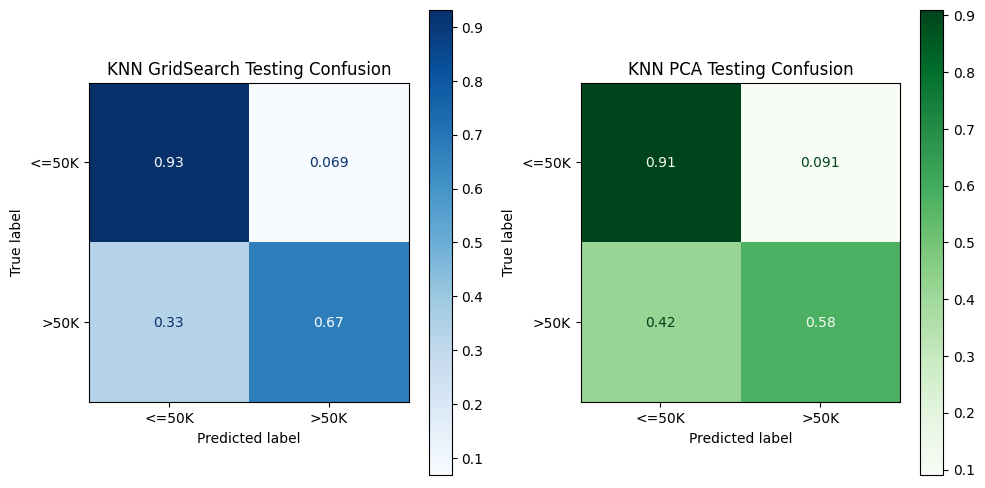

In [107]:
# Create and display a confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, gs_knn_train_preds,
                                        display_labels=labels,
                                        cmap='Blues',
                                        normalize='true',
                                        ax=axes[0])
axes[0].set_title('KNN GridSearch Testing Confusion')

ConfusionMatrixDisplay.from_predictions(y_test, pca_knn_test_preds,
                                        display_labels=labels,
                                        cmap='Greens',
                                        normalize='true',
                                        ax=axes[1])
axes[1].set_title('KNN PCA Testing Confusion')

plt.tight_layout()
;

- KNN PCA model decrease the ability to accuratly predict the True negative and positive. 

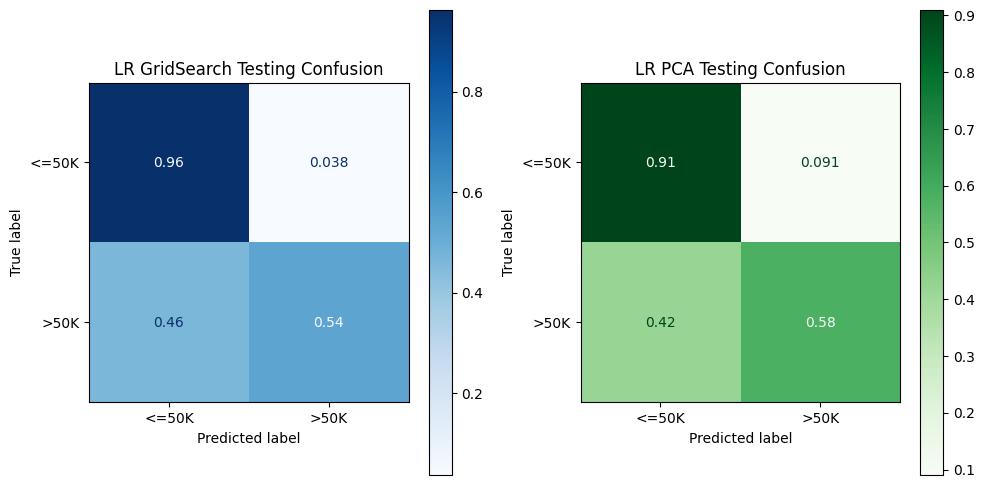

In [108]:
# Create and display a confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, gs_rf_train_preds,
                                        display_labels=labels,
                                        cmap='Blues',
                                        normalize='true',
                                        ax=axes[0])
axes[0].set_title('LR GridSearch Testing Confusion')

ConfusionMatrixDisplay.from_predictions(y_test, pca_knn_test_preds,
                                        display_labels=labels,
                                        cmap='Greens',
                                        normalize='true',
                                        ax=axes[1])
axes[1].set_title('LR PCA Testing Confusion')

plt.tight_layout()

- Logistic Regression model performed better than the PCA model 

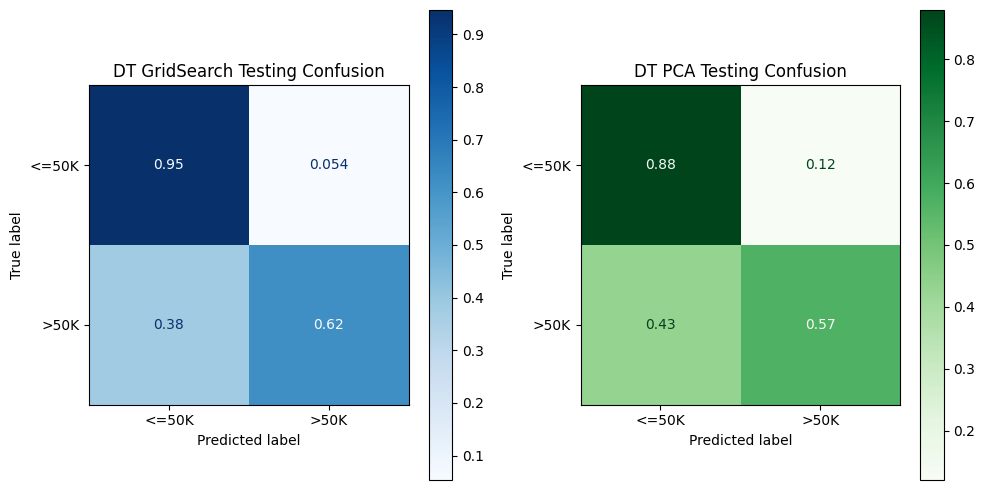

In [109]:
# Create and display a confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, gs_dt_train_preds,
                                        display_labels=labels,
                                        cmap='Blues',
                                        normalize='true',
                                        ax=axes[0])
axes[0].set_title('DT GridSearch Testing Confusion')

ConfusionMatrixDisplay.from_predictions(y_test, pca_dt_test_preds,
                                        display_labels=labels,
                                        cmap='Greens',
                                        normalize='true',
                                        ax=axes[1])
axes[1].set_title('DT PCA Testing Confusion')

plt.tight_layout()

- Decision Tree tuned is performing better than th PCA model as the True Negative and positves are at a higher percentage. 

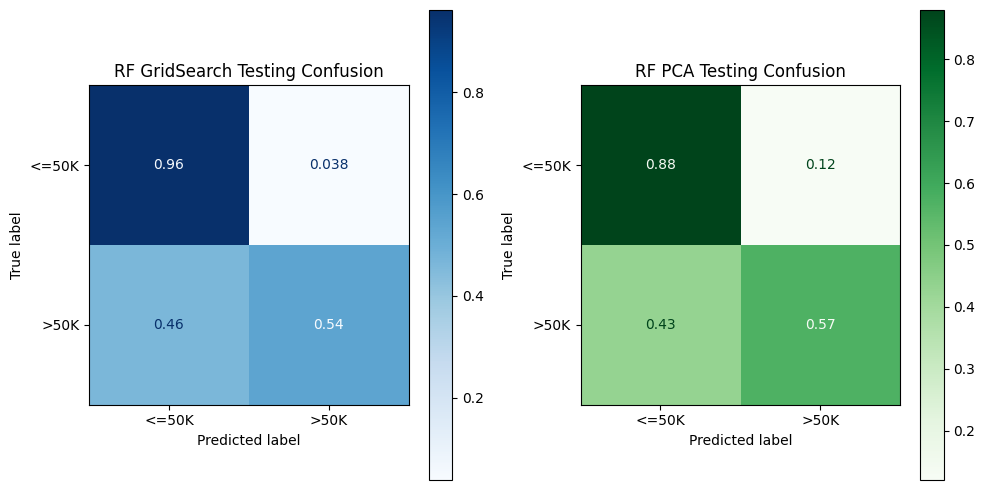

In [110]:
# Create and display a confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, gs_rf_train_preds,
                                        display_labels=labels,
                                        cmap='Blues',
                                        normalize='true',
                                        ax=axes[0])
axes[0].set_title('RF GridSearch Testing Confusion')

ConfusionMatrixDisplay.from_predictions(y_test, pca_rf_test_preds,
                                        display_labels=labels,
                                        cmap='Greens',
                                        normalize='true',
                                        ax=axes[1])
axes[1].set_title('RF PCA Testing Confusion')

plt.tight_layout()

- Random Forest: True negatives decreased to False positives for the PCA model, while improving the True Positives minimally.

- Models is nopt accurate enough in determining True Positives which are incomes greater than 50K.

# Chosen Model 

Random Forest Tuned Model was the scored th highest in accuracy and 

All better performing models are still lacking in the ability to perdict True Positves. This can be that the dataset is is off balance with a greater amount of individuals 50K or less. We could balance the data with under sampling to make the 50K or less match the greater than 50K observations, this would be the prefered method, instead of duplicating or randomized additional data to the greater than 50K group to match the less than or equal to 50K group.